# Análisis de Ventas de Videojuegos: Identificando el Éxito

## Introducción

Trabajamos para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tenemos que identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de nosotros hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estamos planeando una campaña para 2017.

El objetivo de este proyecto es adquirir experiencia de trabajo con datos. No importa si estamos pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Abrir el archivo de datos y estudiar la información general

En este primer paso, cargaremos el archivo de datos y echaremos un vistazo a las primeras filas para entender la estructura del dataset y la información que contiene. También obtendremos una descripción general de las columnas y los tipos de datos.


In [1]:
import pandas as pd


In [2]:
# Cargar el archivo CSV
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

print(df.head())

print(df.info())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

### Reemplazar los nombres de las columnas (ponerlos en minúsculas)

Para asegurarnos de que los nombres de las columnas sean consistentes y fáciles de manejar, convertiremos todos los nombres de las columnas a minúsculas.


In [3]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()
print(df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Convertir los datos en los tipos necesarios

Revisaremos los tipos de datos actuales y convertiremos las columnas `year_of_release` y `user_score` a tipos numéricos porque representan datos numéricos.


In [4]:
# Verificar los tipos de datos actuales
print(df.dtypes)

# Convertir 'year_of_release' a tipo numérico
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Convertir 'user_score' a tipo numérico, primero debemos reemplazar los valores 'tbd'
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Mostrar los tipos de datos después de la conversión
print(df.dtypes)


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


### Tratar los valores ausentes

Revisaremos las columnas que tienen valores ausentes y decidiremos cómo manejarlos. Para `year_of_release`, llenaremos los valores ausentes con la mediana, y para `user_score` usaremos la media.


In [5]:
# Verificar los valores ausentes
print(df.isnull().sum())


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


#### Pasos a seguir

1. `year_of_release`: Llenaremos los valores ausentes con la mediana de esta columna, ya que los años de lanzamiento son datos numéricos continuos y la mediana es una buena medida central que no se ve afectada por los valores extremos.

2. `user_score`: Llenaremos los valores ausentes con la media de esta columna. Al ser una puntuación de usuario, la media proporcionará un valor representativo para los datos faltantes.

3. `critic_score` y `rating`: Decidiremos qué hacer con estas columnas basándonos en la cantidad de valores ausentes y su impacto en el análisis posterior. Consideraremos rellenar los valores ausentes con una estrategia adecuada o excluir estas columnas del análisis si tienen demasiados valores faltantes.

In [6]:
# Llenar valores ausentes en 'year_of_release' con la mediana
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

# Llenar valores ausentes en 'user_score' con la media
df['user_score'] = df['user_score'].fillna(df['user_score'].median())
# Mostrar los valores ausentes después de llenarlos
print(df.isnull().sum())


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64


### Tratar los valores ausentes en `name`, `genre`, `critic_score` y `rating`

Revisaremos cómo manejar los valores ausentes en las columnas `name`, `genre`, `critic_score` y `rating`.

1. `name`: Eliminaremos las filas con valores ausentes, ya que el nombre del juego es esencial para el análisis.
2. `genre`: Eliminaremos las filas con valores ausentes, ya que el género es crucial para la clasificación y el análisis de los juegos.
3. `critic_score`: Debido a la gran cantidad de valores ausentes, podemos considerar dos opciones: eliminar esta columna del análisis o rellenar los valores ausentes con una estrategia adecuada, como la media o mediana.
4. `rating`: Similar a `critic_score`, debido a la gran cantidad de valores ausentes, consideraremos eliminar esta columna del análisis o rellenar los valores ausentes con una estrategia adecuada.

Primero, eliminaremos las filas con valores ausentes en `name` y `genre`.


In [7]:
# Eliminar filas con valores ausentes en 'name' y 'genre'
df = df.dropna(subset=['name', 'genre'])

# Mostrar los valores ausentes después de eliminar filas
print(df.isnull().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64


### Tratar los valores ausentes en `critic_score` y `rating`

Para las columnas `critic_score` y `rating`, decidiremos cómo manejarlos basándonos en la cantidad de valores ausentes y su impacto en el análisis posterior:

1. `critic_score`: Debido a la gran cantidad de valores ausentes, consideraremos eliminar esta columna del análisis para evitar distorsiones.
2. `rating`: Similar a `critic_score`, rellenaremos estos valores con una categoría común como "Unknown".


In [29]:
# Calcular la media de critic_score excluyendo los valores nulos
mean_critic_score = df['critic_score'].median()

# Rellenar los valores nulos en critic_score con la media calculada
df['critic_score'].fillna(mean_critic_score, inplace=True)

# Verificar que no queden valores nulos en la columna critic_score
print(df['critic_score'].isnull().sum())

# Rellenar valores ausentes en 'rating' con "Unknown"
df['rating'] = df['rating'].fillna('Unknown')

# Mostrar los valores ausentes después de llenarlos
print(df.isnull().sum())


0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64


### Calcular las ventas totales

Calcularemos las ventas totales para cada juego sumando las ventas en todas las regiones (`na_sales`, `eu_sales`, `jp_sales` y `other_sales`) y colocaremos estos valores en una columna separada llamada `total_sales`.


In [9]:
# Calcular las ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Mostrar los primeros registros para verificar
print(df.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45     76.000000         8.0        E   
1      3.58      6.81         0.77     68.967679         7.5  Unknown   
2     12.76      3.79         3.29     82.000000         8.3        E   
3     10.93      3.28         2.95     80.000000         8.0        E   
4      8.89     10.22         1.00     68.967679         7.5  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

##  Número de juegos lanzados por año

Analizaremos cuántos juegos fueron lanzados en diferentes años. Esto nos permitirá ver si hay períodos con más actividad en la industria de los videojuegos.


1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1466
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


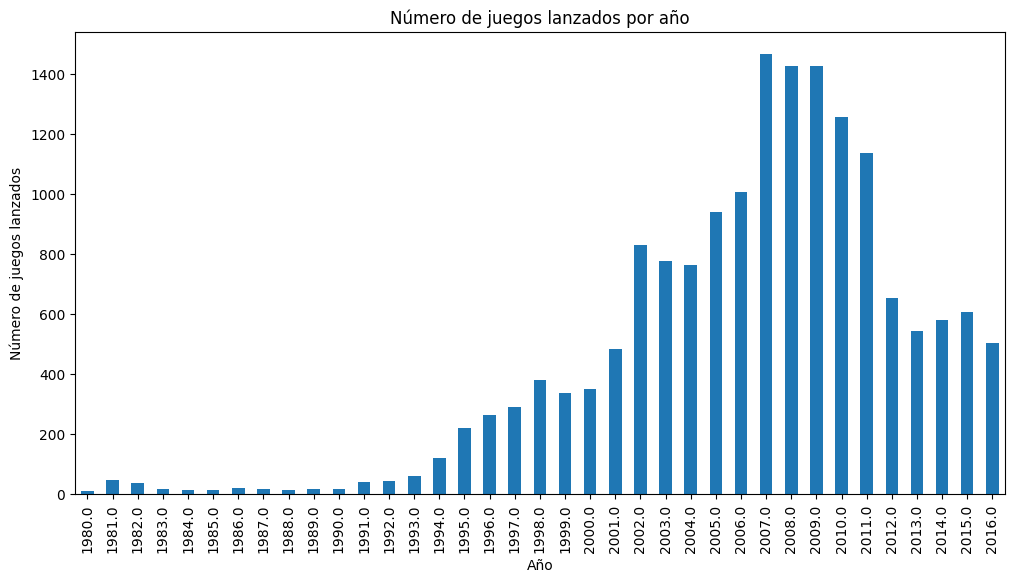

In [10]:
# Contar el número de juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar el resultado
print(games_per_year)

# Graficar el resultado
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos lanzados')
plt.show()


**Conclusiones parciales**

El análisis del número de juegos lanzados por año muestra un incremento constante en la cantidad de juegos lanzados hasta 2008, después de lo cual hay una tendencia decreciente. Este patrón sugiere que la industria de los videojuegos experimentó un crecimiento significativo hasta finales de la década de 2000, seguido de una estabilización o posible contracción en los lanzamientos de nuevos juegos. Los datos recientes (2013 en adelante) son suficientes para construir modelos predictivos para 2017, ya que representan las tendencias actuales del mercado.

### Ventas por plataforma
En esta sección, analizaremos cómo varían las ventas de una plataforma a otra. Para lograr esto, seguiremos los siguientes pasos:

1.- Calcular las ventas totales por plataforma para identificar cuáles son las más exitosas.

2.- Construir una distribución de ventas basada en los datos de cada año para observar las tendencias a lo largo del tiempo.

3.- Identificar plataformas que solían ser populares pero que ahora no tienen ventas.

4.- Analizar cuánto tiempo tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

5.- Estos análisis nos permitirán entender mejor el ciclo de vida de las plataformas de videojuegos y planificar mejor nuestras estrategias de marketing y desarrollo de productos.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


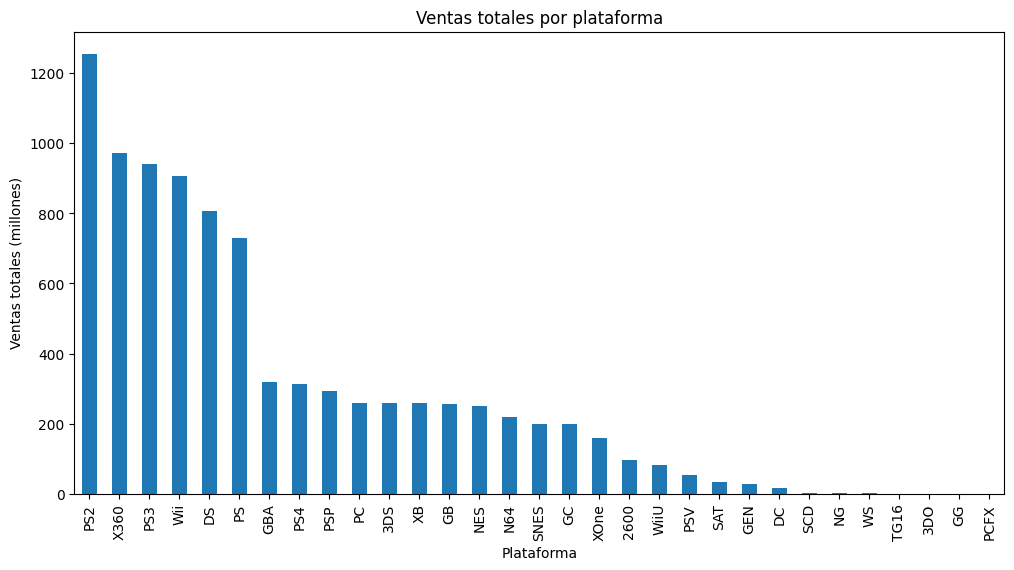

In [11]:
# Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas totales
print(platform_sales.head(10))

# Graficar las ventas totales por plataforma
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.show()


**Conclusiones parciales**

Las plataformas PS2, X360, y PS3 lideran las ventas totales, seguidas de cerca por Wii y DS. Esto indica que estas plataformas han sido extremadamente populares y exitosas en términos de ventas. Sin embargo, también observamos que algunas plataformas más antiguas, como NES y SNES, tienen ventas significativamente menores, lo que refleja su ciclo de vida más antiguo y la menor capacidad de competir con las plataformas más modernas.

### Distribución de ventas por plataforma a lo largo de los años

En esta sección, analizaremos cómo varían las ventas de las plataformas más exitosas a lo largo del tiempo. Identificaremos las plataformas que solían ser populares pero que ahora no tienen ventas y analizaremos el ciclo de vida de las plataformas.


<Figure size 1500x800 with 0 Axes>

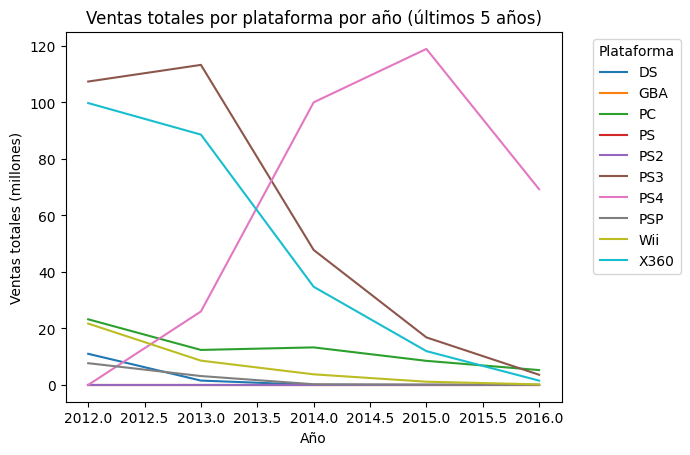

In [32]:
# Identificar las plataformas con mayores ventas
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10).index

platform_sales_per_year = df[df['platform'].isin(top_platforms)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Filtrar los datos para los últimos 5 años disponibles
recent_years = platform_sales_per_year.loc[platform_sales_per_year.index >= 2012]

# Graficar las ventas totales por plataforma por año
plt.figure(figsize=(15, 8))
recent_years.plot()
plt.title('Ventas totales por plataforma por año (últimos 5 años)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###  Análisis del ciclo de vida de las plataformas

En esta sección, identificaremos las plataformas que solían ser populares pero que ahora no tienen ventas. También analizaremos cuánto tiempo tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.


platform
DS      28.0
GBA      7.0
PC      31.0
PS      13.0
PS2     11.0
PS3     10.0
PS4      3.0
PSP     11.0
Wii     10.0
X360    11.0
dtype: float64


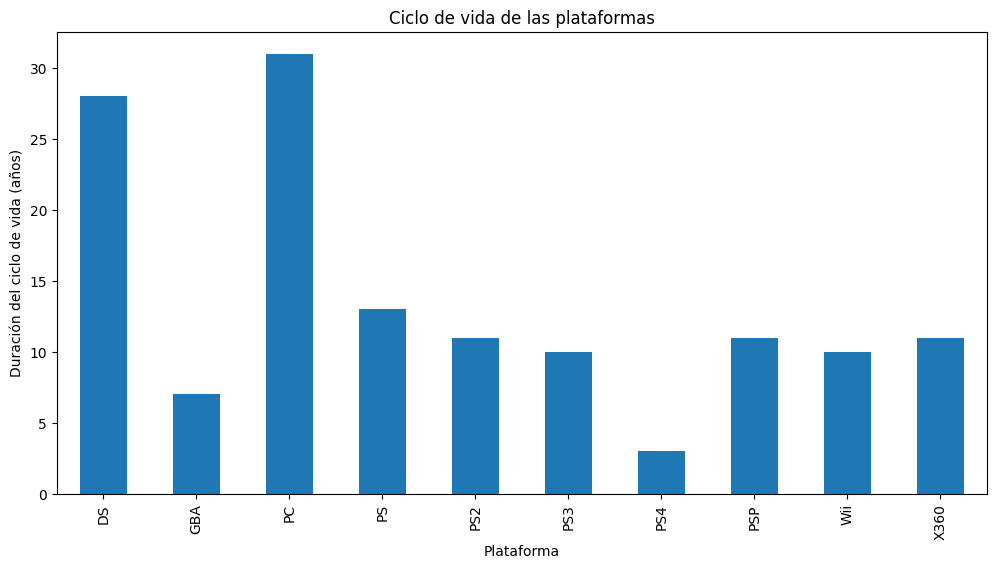

In [13]:
# Identificar las plataformas que solían ser populares pero que ahora no tienen ventas
platform_life_cycle = platform_sales_per_year.apply(lambda x: x[x > 0].index.max() - x[x > 0].index.min())
print(platform_life_cycle)

# Graficar el ciclo de vida de las plataformas
plt.figure(figsize=(12, 6))
platform_life_cycle.plot(kind='bar')
plt.title('Ciclo de vida de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Duración del ciclo de vida (años)')
plt.show()


**Conclusiones parciales**

El análisis del ciclo de vida de las plataformas muestra que la mayoría de las plataformas tienen un ciclo de vida promedio de aproximadamente 10 años. Algunas plataformas, como DS y PC, tiene un ciclo de vida más largo, lo que indica su duradera popularidad y éxito en el mercado. Esta información es crucial para prever cuándo una nueva plataforma podría alcanzar su punto máximo y cuándo podría comenzar a declinar.

## Determinación del período de datos relevante

En esta sección, determinaremos para qué período debemos tomar datos para construir un modelo para 2017. Esto se basará en las respuestas a las preguntas anteriores sobre las tendencias de ventas y el ciclo de vida de las plataformas.


2013.0    544
2014.0    581
2015.0    606
2016.0    502
Name: year_of_release, dtype: int64


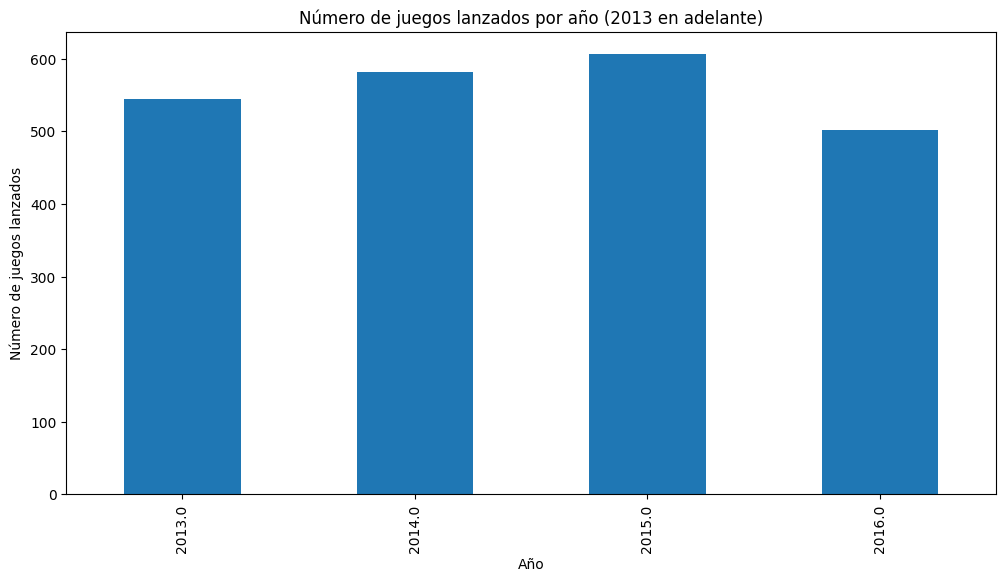

In [14]:
# Analizar el período de datos relevante
# Filtrar los datos para incluir solo los últimos años relevantes
relevant_years = df[df['year_of_release'] >= 2013]

# Mostrar la distribución de juegos lanzados en los últimos años relevantes
relevant_years_per_year = relevant_years['year_of_release'].value_counts().sort_index()
print(relevant_years_per_year)

# Graficar la distribución de juegos lanzados en los últimos años relevantes
plt.figure(figsize=(12, 6))
relevant_years_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año (2013 en adelante)')
plt.xlabel('Año')
plt.ylabel('Número de juegos lanzados')
plt.show()


### Identificación de plataformas líderes en ventas

En esta sección, identificaremos las plataformas líderes en ventas y analizaremos cuáles están creciendo y cuáles están disminuyendo. Esto nos ayudará a elegir plataformas potencialmente rentables para el futuro.


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


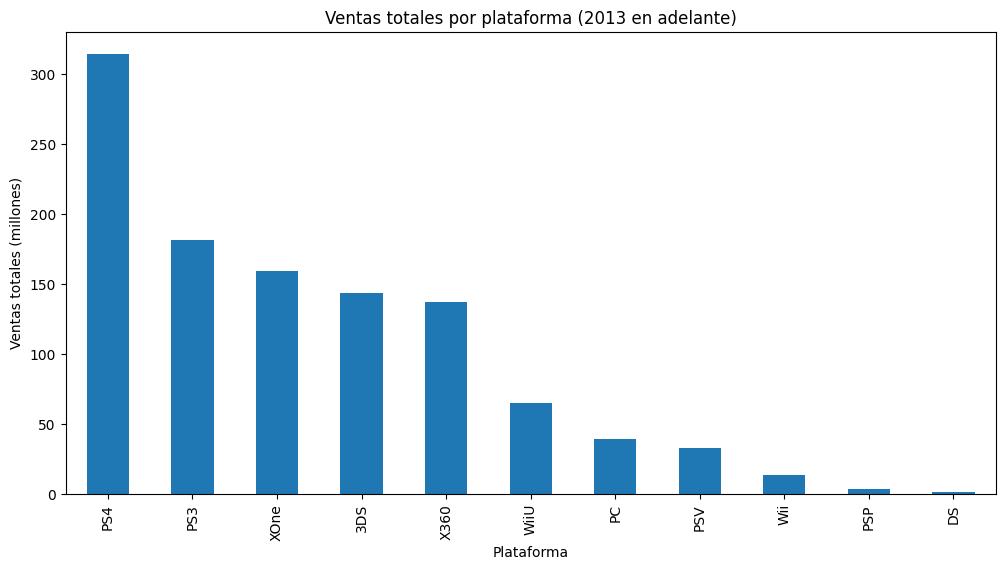

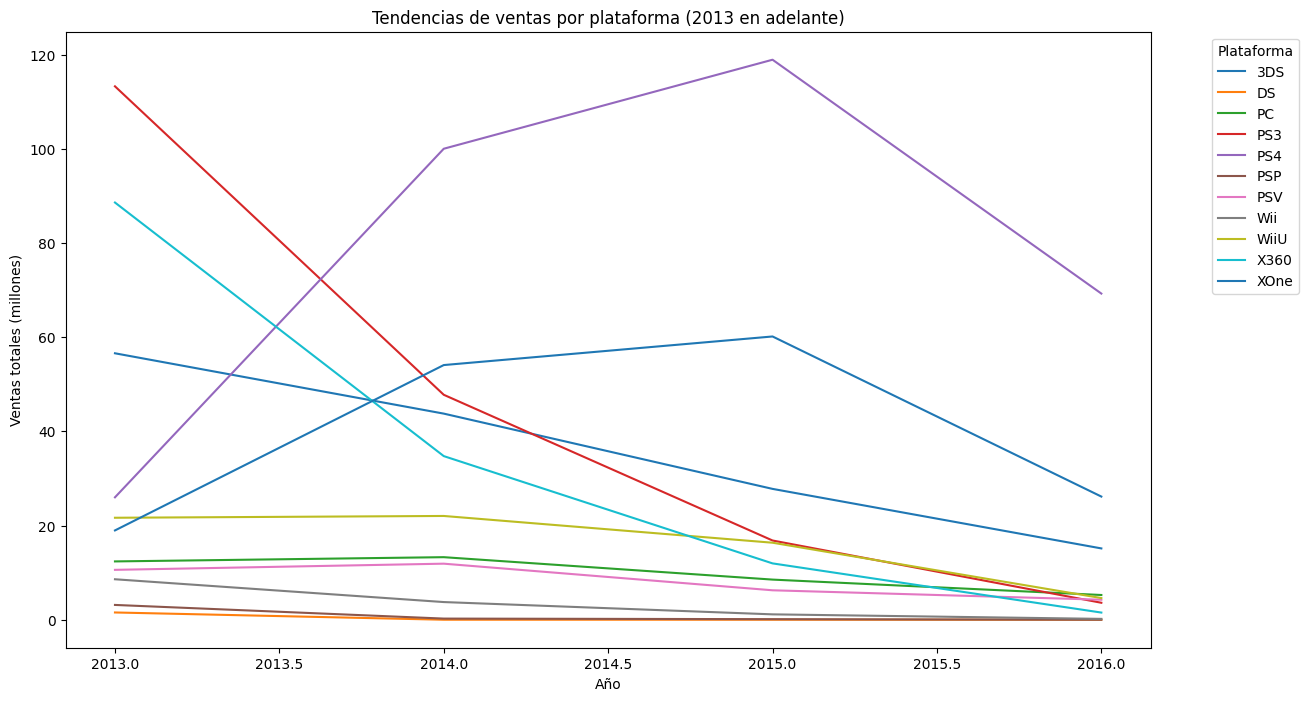

In [15]:
# Identificar las plataformas líderes en ventas
platform_sales_recent = relevant_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales_recent.head(10))

# Graficar las ventas totales por plataforma en los últimos años
plt.figure(figsize=(12, 6))
platform_sales_recent.plot(kind='bar')
plt.title('Ventas totales por plataforma (2013 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Analizar el crecimiento o decrecimiento de las ventas por plataforma a lo largo de los años
platform_sales_trend = relevant_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
platform_sales_trend.plot(kind='line', figsize=(14, 8))
plt.title('Tendencias de ventas por plataforma (2013 en adelante)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Creación de diagramas de caja para las ventas globales por plataforma

En esta sección, crearemos diagramas de caja (box plots) para las ventas globales de todos los juegos, desglosados por plataforma. Esto nos ayudará a entender la distribución de las ventas y si existen diferencias significativas entre las plataformas.


<Figure size 1400x800 with 0 Axes>

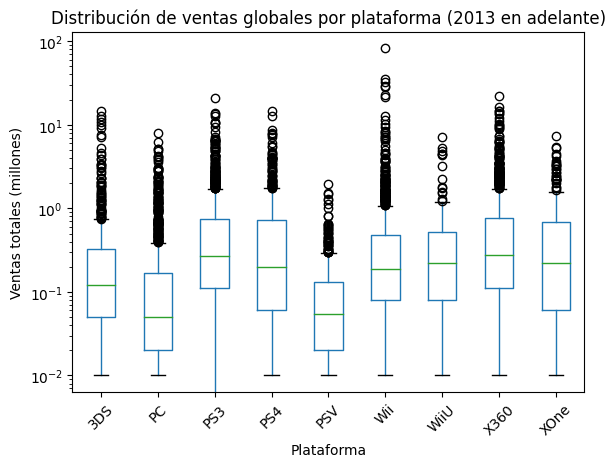

In [37]:
# Seleccionar solo las plataformas principales
main_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii']

# Filtrar el DataFrame para incluir solo las plataformas principales
filtered_df = df[df['platform'].isin(main_platforms)]
plt.figure(figsize=(14, 8))
filtered_df.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Distribución de ventas globales por plataforma (2013 en adelante)')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.yscale('log')  # Usamos escala logarítmica para mejor visualización
plt.xticks(rotation=45)
plt.show()


**Conclusiones parciales**

Los diagramas de caja de las ventas globales por plataforma (2013 en adelante) muestran que las plataformas PS4 y XOne tienen las ventas medianas más altas, lo que indica su popularidad y éxito continuos. La variación en las ventas sugiere que, aunque estas plataformas tienen altos volúmenes de ventas, también existe una significativa dispersión, reflejando la diversidad en la aceptación y éxito de los juegos lanzados en estas plataformas. La consola PS3 se ve como un contendiente fuerte a vencer pero esto cambia si vemos las tendencias de ventas anteriormente analizadas. Lo mismo pasa con Wii tiene valores atípicos muy altos, esto significa con ventas altas.

### Análisis de las reseñas de usuarios

En esta sección, analizaremos cómo las reseñas de usuarios afectan las ventas de una plataforma popular. Nos centraremos en la plataforma PS4 y exploraremos la relación entre las reseñas y las ventas utilizando gráficos de dispersión y cálculo de correlación.


Cantidad de valores no numéricos en user_score: 0
Correlación entre las reseñas de los usuarios y las ventas para PS4: -0.06275557891282788


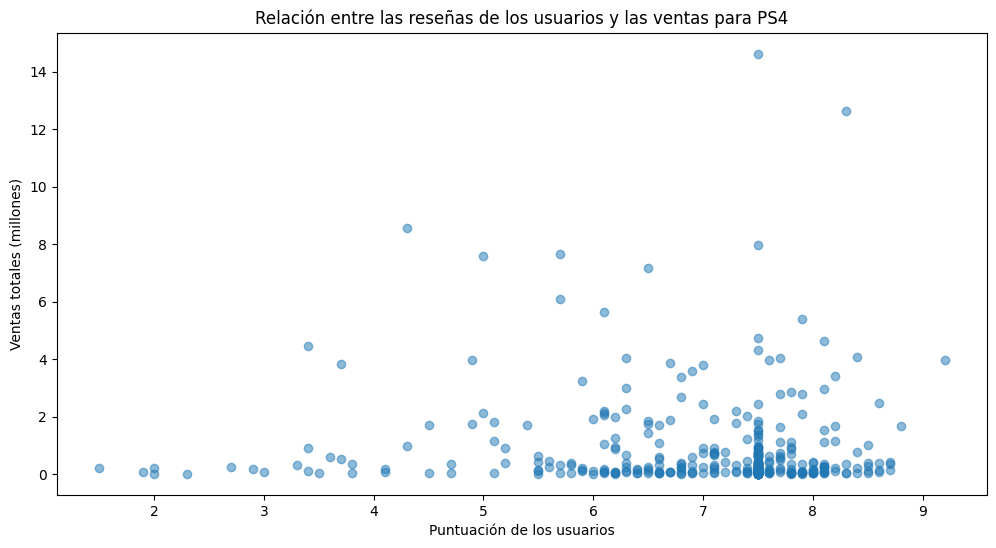

In [17]:
# Filtrar los datos para la plataforma PS4
ps4_data = df[df['platform'] == 'PS4']

# Asegurarnos de que todos los valores 'Unknown' fueron eliminados
ps4_data = ps4_data[ps4_data['user_score'] != 'Unknown']

# Convertir 'user_score' a tipo numérico
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

# Calcular la cantidad de valores no numéricos en user_score
non_numeric_user_scores = ps4_data['user_score'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
print('Cantidad de valores no numéricos en user_score:', non_numeric_user_scores)

# Recalcular la correlación entre 'user_score' y 'total_sales'
correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Correlación entre las reseñas de los usuarios y las ventas para PS4:', correlation)

# Crear un gráfico de dispersión para las reseñas de los usuarios
plt.figure(figsize=(12, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Relación entre las reseñas de los usuarios y las ventas para PS4')
plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales (millones)')
plt.show()


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas.
</div>

**Conclusiones parciales**

El gráfico de dispersión para las reseñas de los usuarios y las ventas en la plataforma PS4 muestra una correlación negativa muy débil (cercana a cero). Esto sugiere que las reseñas de los usuarios no tienen un impacto significativo en las ventas de los juegos para PS4. Otros factores, como la marca, la publicidad y la popularidad previa del juego, podrían tener un mayor impacto en las ventas.

### Comparación de ventas de los mismos juegos en diferentes plataformas

En esta sección, compararemos las ventas de los mismos juegos en diferentes plataformas para ver si hay diferencias significativas. Nos centraremos en los juegos que están disponibles en múltiples plataformas.


platform                         DS   GB  N64  NES  PS2    PS3    PS4  SNES  \
name                                                                          
Call of Duty: Black Ops         0.0  0.0  0.0  0.0  0.0  12.63   0.00   0.0   
Call of Duty: Black Ops 3       0.0  0.0  0.0  0.0  0.0   0.00  14.63   0.0   
Call of Duty: Black Ops II      0.0  0.0  0.0  0.0  0.0  13.79   0.00   0.0   
Call of Duty: Ghosts            0.0  0.0  0.0  0.0  0.0   0.00   0.00   0.0   
Call of Duty: Modern Warfare 2  0.0  0.0  0.0  0.0  0.0  10.61   0.00   0.0   

platform                        Wii   X360  
name                                        
Call of Duty: Black Ops         0.0  14.62  
Call of Duty: Black Ops 3       0.0   0.00  
Call of Duty: Black Ops II      0.0  13.68  
Call of Duty: Ghosts            0.0  10.24  
Call of Duty: Modern Warfare 2  0.0  13.47  


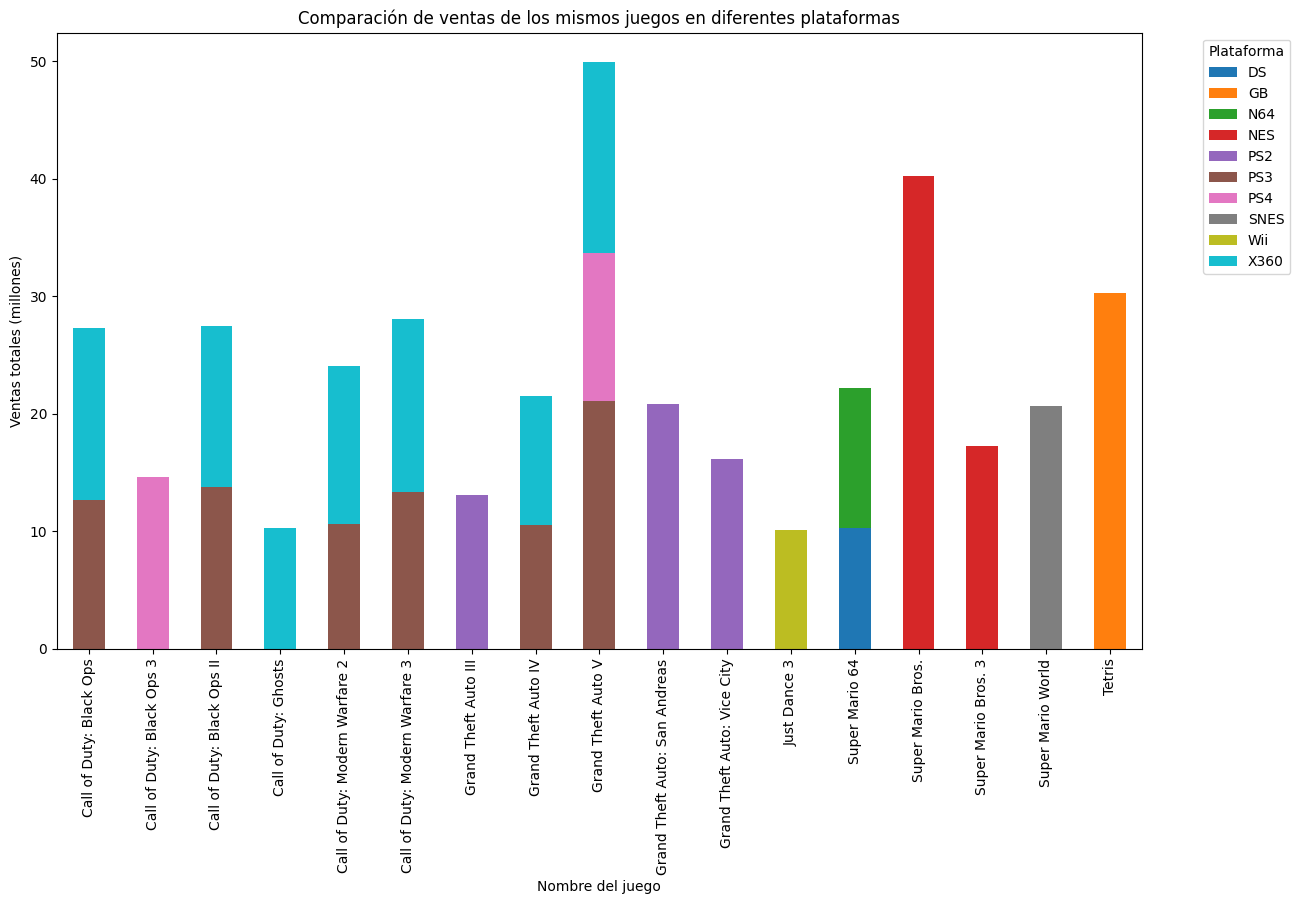

In [18]:
# Filtrar el DataFrame para incluir solo los juegos que están en múltiples plataformas
multi_platform_games = df.groupby('name').filter(lambda x: x['platform'].nunique() > 1)

# Filtrar los juegos con mayores ventas
top_multi_platform_games = multi_platform_games[multi_platform_games['total_sales'] > 10.0]

# Comparar las ventas de los mismos juegos en diferentes plataformas
multi_platform_sales = top_multi_platform_games.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Mostrar los primeros registros de la comparación
print(multi_platform_sales.head())

# Crear un gráfico de barras apiladas para comparar las ventas
multi_platform_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Comparación de ventas de los mismos juegos en diferentes plataformas')
plt.xlabel('Nombre del juego')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Conclusiones parciales**

El análisis de la comparación de ventas de los mismos juegos en diferentes plataformas muestra que muchos de los juegos más vendidos mantienen rendimientos de ventas similares en múltiples plataformas. Esto sugiere que ciertos títulos tienen una popularidad consistente independientemente de la plataforma en la que se lanzan, destacando la importancia de lanzar juegos en múltiples plataformas para maximizar las ventas.

## Distribución de los juegos por género

En esta sección, analizaremos la distribución de los juegos por género y determinaremos cuáles son los más rentables. Esto nos permitirá identificar patrones y preferencias de los usuarios en cuanto a los géneros de los videojuegos.

Pasos:
1. Calcular la distribución de los juegos por género.
2. Calcular las ventas totales por género.
3. Graficar los resultados para visualizar la distribución y la rentabilidad de los géneros.


Distribución de los juegos por género:
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Ventas totales por género:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


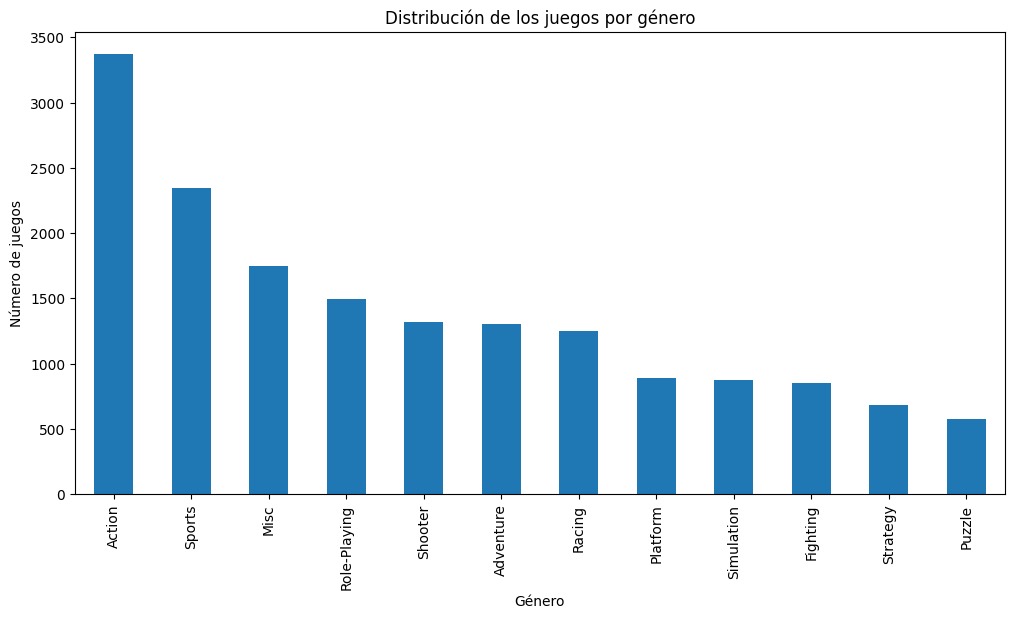

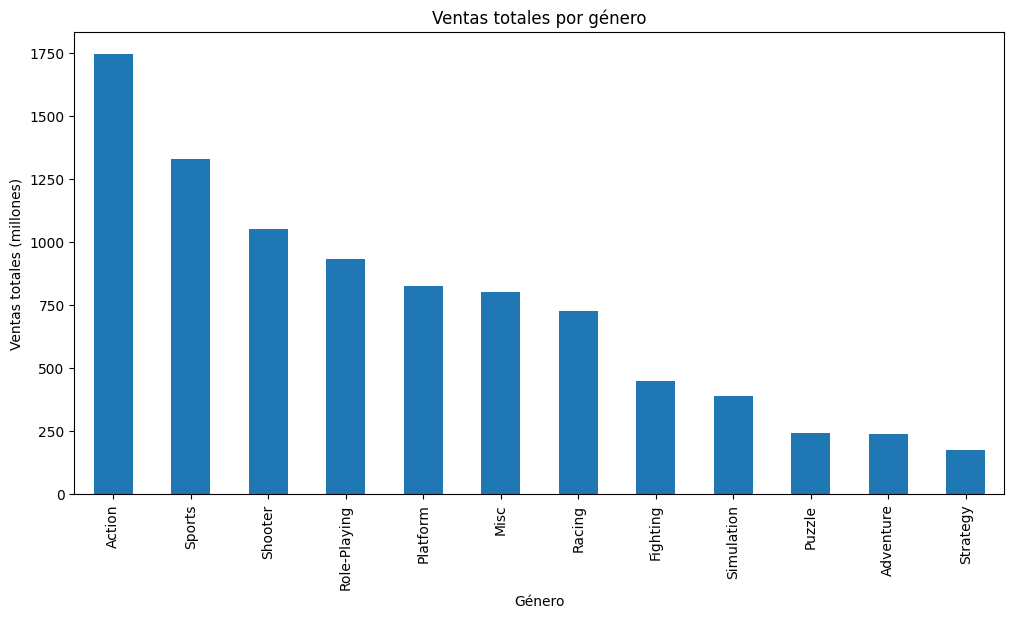

In [19]:
# Calcular la distribución de los juegos por género
genre_distribution = df['genre'].value_counts()

# Calcular las ventas totales por género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostrar los resultados
print("Distribución de los juegos por género:")
print(genre_distribution)
print("\nVentas totales por género:")
print(genre_sales)

# Graficar la distribución de los juegos por género
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar')
plt.title('Distribución de los juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.show()

# Graficar las ventas totales por género
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.show()


**Conclusiones parciales**


El género "Action" es el más popular y también el más rentable, liderando tanto en el número de juegos lanzados como en ventas totales.

Los géneros "Sports" y "Shooter" también son altamente rentables, a pesar de tener menos juegos lanzados comparados con "Misc" y "Role-Playing".

La categoría "Misc" tiene una gran cantidad de juegos lanzados, pero sus ventas totales no son tan altas en comparación con otros géneros principales.

Los géneros como "Puzzle", "Adventure" y "Strategy" tienen menos juegos lanzados y también menores ventas totales, indicando una menor popularidad y rentabilidad en el mercado.

Este análisis sugiere que enfocar los esfuerzos en géneros como "Action", "Sports" y "Shooter" podría ser una estrategia eficaz para maximizar las ventas y el éxito en el mercado de videojuegos.

## Crear un perfil de usuario para cada región
Para cada región (NA, EU, JP), determinaremos:

Las cinco plataformas principales y describiremos las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales y explicaremos las diferencias.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Las cinco plataformas principales por región

Para cada región (NA, EU, JP), calcularemos las ventas por plataforma y luego identificaremos las cinco plataformas principales en cada una. Esto nos permitirá entender mejor las diferencias en las preferencias de las plataformas de videojuegos en distintas regiones.


Ventas por plataforma en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Ventas por plataforma en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Ventas por plataforma en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


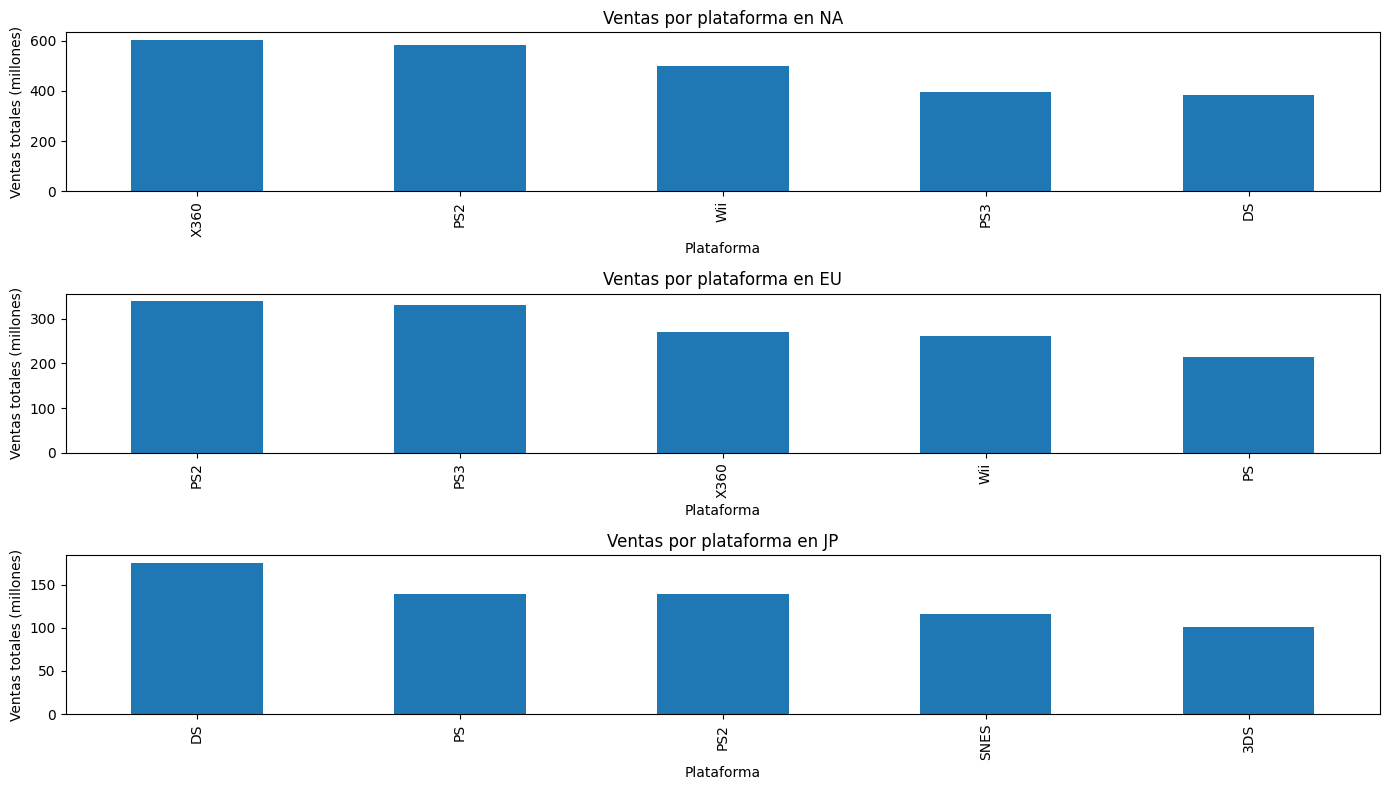

In [20]:
# Calcular las ventas por plataforma para cada región
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Mostrar las cinco plataformas principales por región
print('Ventas por plataforma en NA:')
print(platform_sales_na.head(5))
print('\nVentas por plataforma en EU:')
print(platform_sales_eu.head(5))
print('\nVentas por plataforma en JP:')
print(platform_sales_jp.head(5))

# Graficar las ventas por plataforma para cada región
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
platform_sales_na.head(5).plot(kind='bar')
plt.title('Ventas por plataforma en NA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')

plt.subplot(3, 1, 2)
platform_sales_eu.head(5).plot(kind='bar')
plt.title('Ventas por plataforma en EU')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')

plt.subplot(3, 1, 3)
platform_sales_jp.head(5).plot(kind='bar')
plt.title('Ventas por plataforma en JP')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')

plt.tight_layout()
plt.show()


### Los cinco géneros principales por región

Para cada región (NA, EU, JP), calcularemos las ventas por género y luego identificaremos los cinco géneros principales en cada una. Esto nos permitirá entender mejor las diferencias en las preferencias de los géneros de videojuegos en distintas regiones.

Ventas por género en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Ventas por género en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Ventas por género en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


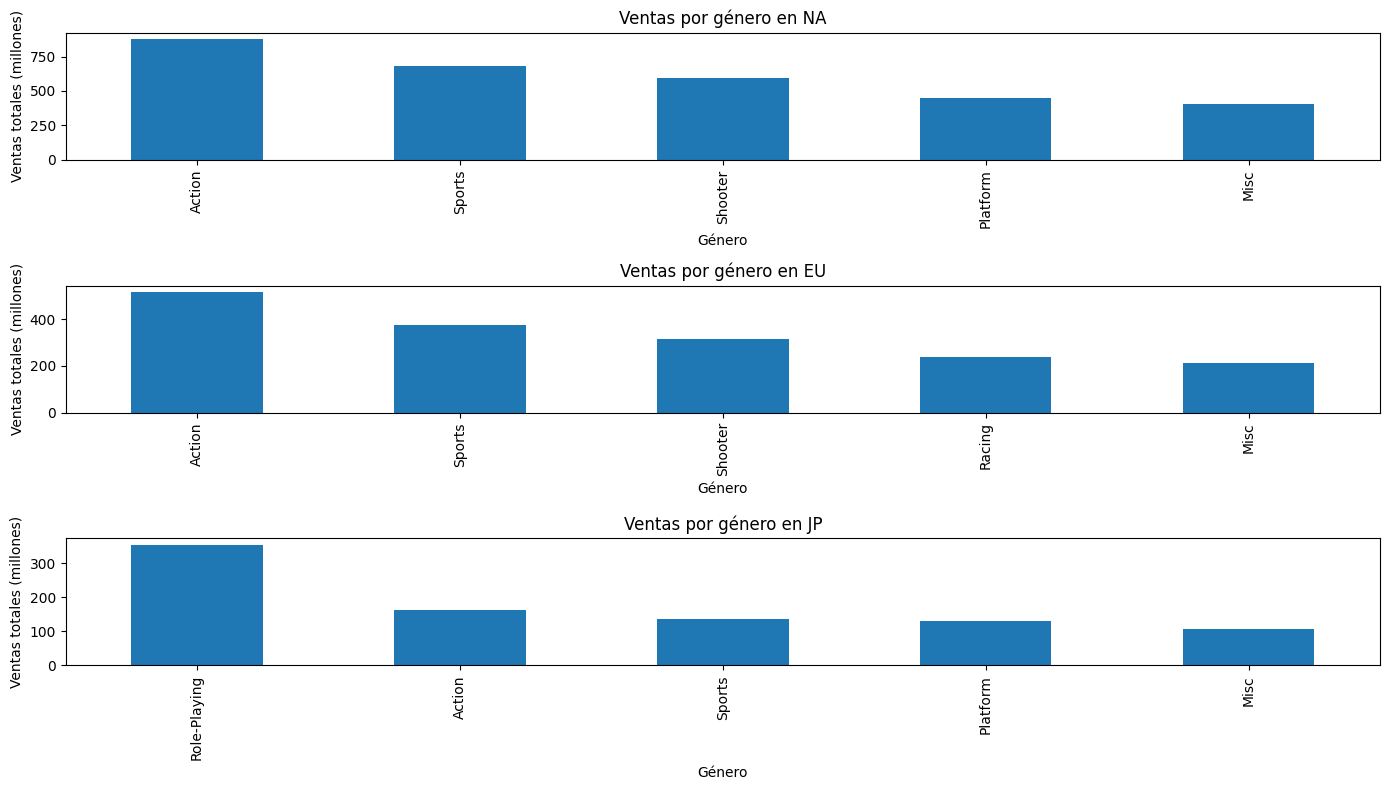

In [21]:
# Calcular las ventas por género para cada región
genre_sales_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Mostrar los cinco géneros principales por región
print('Ventas por género en NA:')
print(genre_sales_na.head(5))
print('\nVentas por género en EU:')
print(genre_sales_eu.head(5))
print('\nVentas por género en JP:')
print(genre_sales_jp.head(5))

# Graficar las ventas por género para cada región
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
genre_sales_na.head(5).plot(kind='bar')
plt.title('Ventas por género en NA')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')

plt.subplot(3, 1, 2)
genre_sales_eu.head(5).plot(kind='bar')
plt.title('Ventas por género en EU')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')

plt.subplot(3, 1, 3)
genre_sales_jp.head(5).plot(kind='bar')
plt.title('Ventas por género en JP')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')

plt.tight_layout()
plt.show()


### Influencia de las clasificaciones ESRB en las ventas en cada región
En esta sección, examinaremos si las clasificaciones ESRB afectan las ventas en las regiones individuales (NA, EU, JP).

In [22]:
# Calcular las ventas totales por clasificación ESRB en NA
na_esrb_sales = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(na_esrb_sales)

# Calcular las ventas totales por clasificación ESRB en EU
eu_esrb_sales = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(eu_esrb_sales)

# Calcular las ventas totales por clasificación ESRB en JP
jp_esrb_sales = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(jp_esrb_sales)


rating
E          1292.99
Unknown    1240.68
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64
rating
E          710.25
Unknown    613.30
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64
rating
Unknown    841.93
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


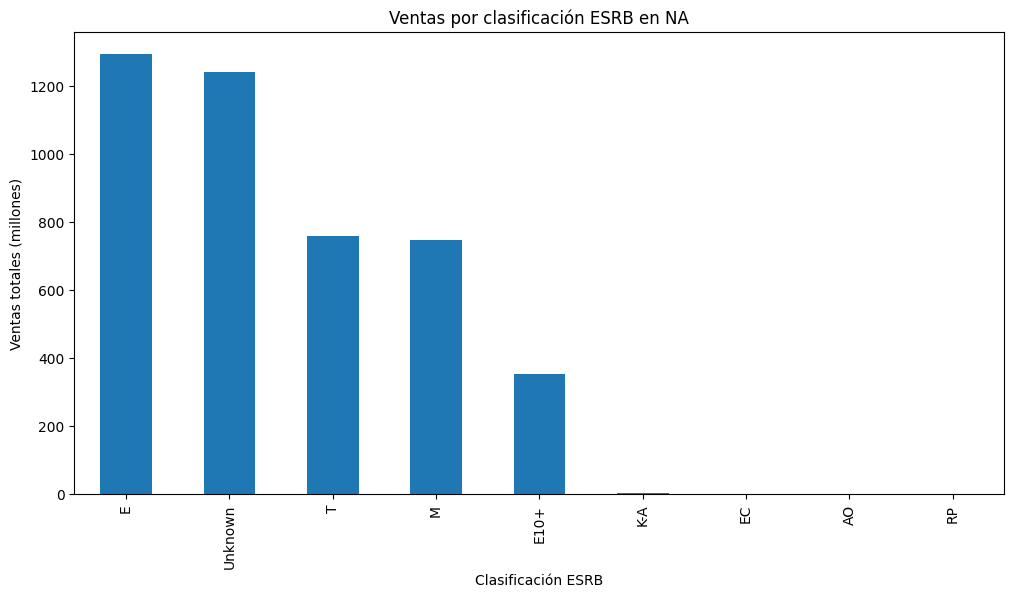

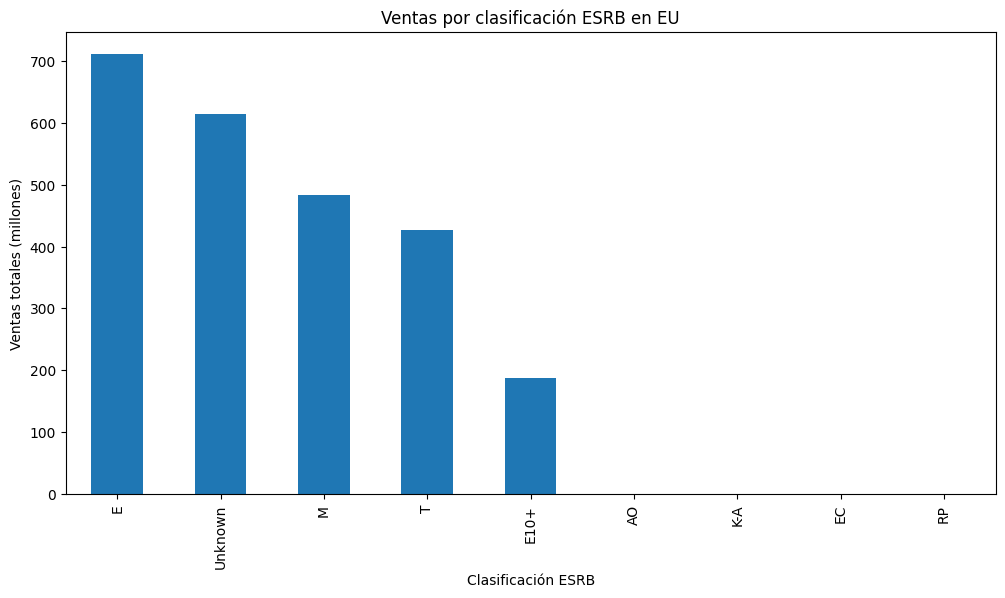

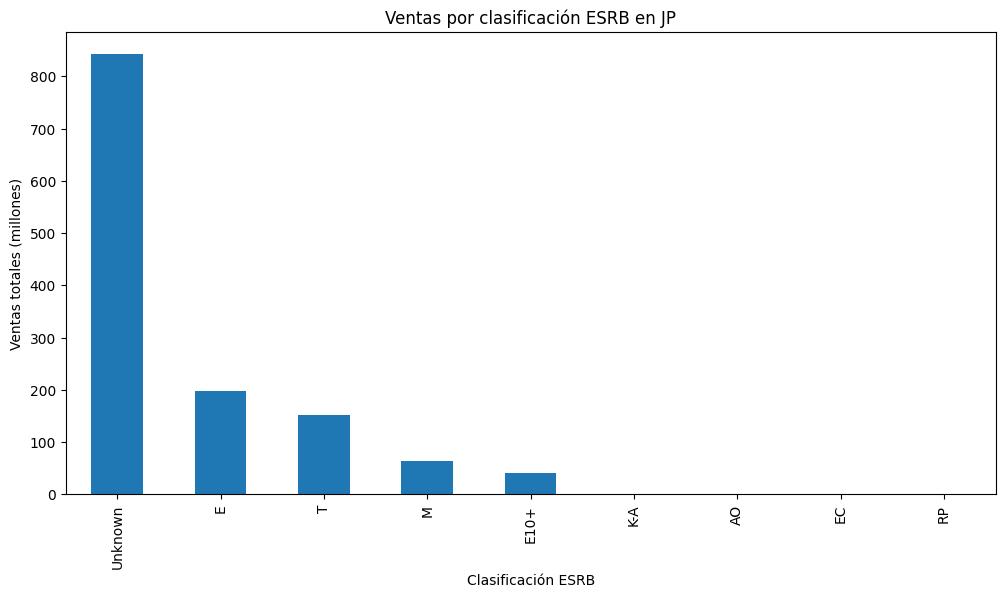

In [23]:
# Graficar las ventas totales por clasificación ESRB en NA
plt.figure(figsize=(12, 6))
na_esrb_sales.plot(kind='bar')
plt.title('Ventas por clasificación ESRB en NA')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Graficar las ventas totales por clasificación ESRB en EU
plt.figure(figsize=(12, 6))
eu_esrb_sales.plot(kind='bar')
plt.title('Ventas por clasificación ESRB en EU')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales (millones)')
plt.show()

# Graficar las ventas totales por clasificación ESRB en JP
plt.figure(figsize=(12, 6))
jp_esrb_sales.plot(kind='bar')
plt.title('Ventas por clasificación ESRB en JP')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales (millones)')
plt.show()


**Conclusiones parciales**

Hemos analizado cómo las ventas varían según la clasificación ESRB en tres regiones principales: Norteamérica (NA), Europa (EU) y Japón (JP). Estos gráficos nos permiten observar las preferencias de los consumidores en cada región con respecto a la clasificación de los juegos. A continuación, presentamos las conclusiones:

Norteamérica (NA)

La clasificación 'E' (Everyone) es la que tiene las mayores ventas, seguida de 'Unknown' y 'T' (Teen).
Las ventas de juegos clasificados como 'M' (Mature) también son significativas.
Las clasificaciones 'E10+' (Everyone 10 and older), 'KA' (Kids to Adults), 'EC' (Early Childhood), 'AO' (Adults Only) y 'RP' (Rating Pending) tienen ventas mucho menores.
Europa (EU)

Similar a NA, la clasificación 'E' lidera las ventas, seguida por 'Unknown' y 'M'.
La clasificación 'T' también tiene ventas significativas, mientras que 'E10+' tiene una presencia menor.
Las clasificaciones 'AO', 'K-A', 'EC' y 'RP' tienen ventas prácticamente insignificantes.
Japón (JP)

En Japón, 'Unknown' es la clasificación con las mayores ventas, lo que sugiere que muchos juegos populares no tienen una clasificación ESRB específica o reconocida en esta región.
La clasificación 'E' sigue en segundo lugar, con 'T' y 'M' más atrás.
Las ventas de juegos clasificados como 'E10+', 'K-A', 'AO', 'EC' y 'RP' son muy bajas o inexistentes.
Estos análisis nos proporcionan una visión clara de las preferencias de los consumidores en cada región, lo que puede ser útil para la estrategia de marketing y desarrollo de productos.

### Correlación entre las reseñas de los críticos y las ventas
En esta sección, analizaremos cómo las reseñas de los críticos afectan las ventas de una plataforma popular. Nos centraremos en la plataforma PS4 y exploraremos la relación entre las reseñas de los críticos y las ventas utilizando gráficos de dispersión y cálculo de correlación.


Correlación entre las reseñas de los críticos y las ventas para PS4: 0.3490095802924567


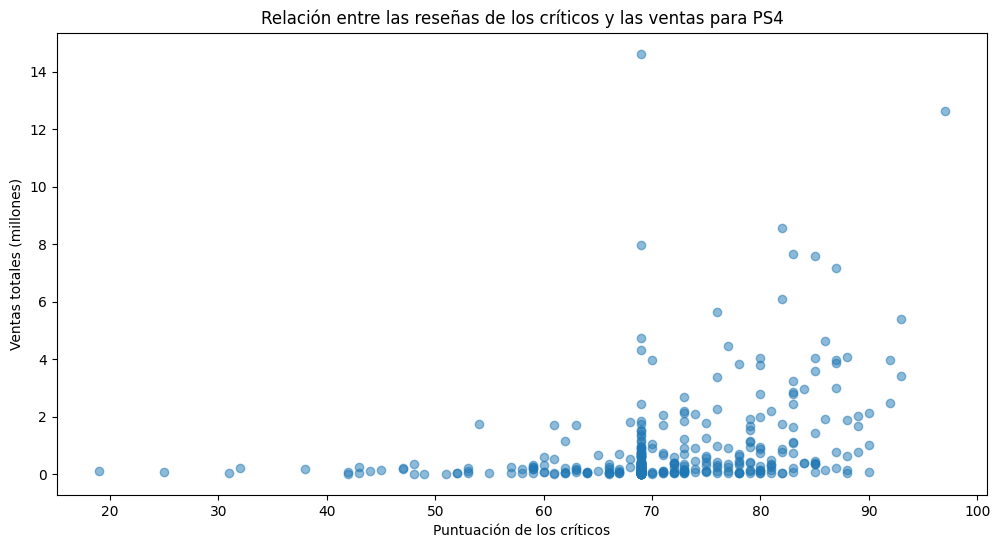

In [24]:
# Filtrar los datos para la plataforma PS4
ps4_data = df[df['platform'] == 'PS4']

# Asegurarnos de que todos los valores 'Unknown' fueron eliminados en 'user_score'
ps4_data = ps4_data[ps4_data['user_score'] != 'Unknown']

# Convertir 'user_score' a tipo numérico
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

# Convertir 'critic_score' a tipo numérico (ya debe estar en este formato)
# Asegurarse de que no hay valores nulos en 'critic_score'
ps4_data = ps4_data.dropna(subset=['critic_score'])

# Calcular la correlación entre 'critic_score' y 'total_sales'
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Correlación entre las reseñas de los críticos y las ventas para PS4:', correlation_critic)

# Crear un gráfico de dispersión para las reseñas de los críticos
plt.figure(figsize=(12, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Relación entre las reseñas de los críticos y las ventas para PS4')
plt.xlabel('Puntuación de los críticos')
plt.ylabel('Ventas totales (millones)')
plt.show()

**Conclusiones parciales**

El análisis muestra una correlación positiva moderada entre las reseñas de los críticos y las ventas para PS4. Esto sugiere que las mejores reseñas de los críticos pueden estar relacionadas con mayores ventas, aunque no necesariamente causarlas directamente.

## Análisis de las ventas globales y sus tendencias
En esta sección, analizaremos las tendencias generales de las ventas globales de videojuegos a lo largo del tiempo. Identificaremos los picos y declives en las ventas globales y observaremos cualquier tendencia notable.


Ventas globales por año de lanzamiento:
year_of_release
1980.0     11.38
1981.0     35.68
1982.0     28.88
1983.0     16.80
1984.0     50.35
1985.0     53.95
1986.0     37.08
1987.0     21.70
1988.0     47.21
1989.0     73.45
1990.0     49.37
1991.0     32.23
1992.0     76.16
1993.0     45.99
1994.0     79.23
1995.0     88.12
1996.0    199.15
1997.0    201.07
1998.0    256.31
1999.0    251.11
2000.0    201.66
2001.0    331.46
2002.0    394.97
2003.0    357.54
2004.0    418.68
2005.0    457.82
2006.0    517.71
2007.0    703.67
2008.0    671.50
2009.0    658.82
2010.0    590.13
2011.0    507.58
2012.0    355.84
2013.0    361.24
2014.0    331.53
2015.0    267.98
2016.0    129.94
Name: total_sales, dtype: float64


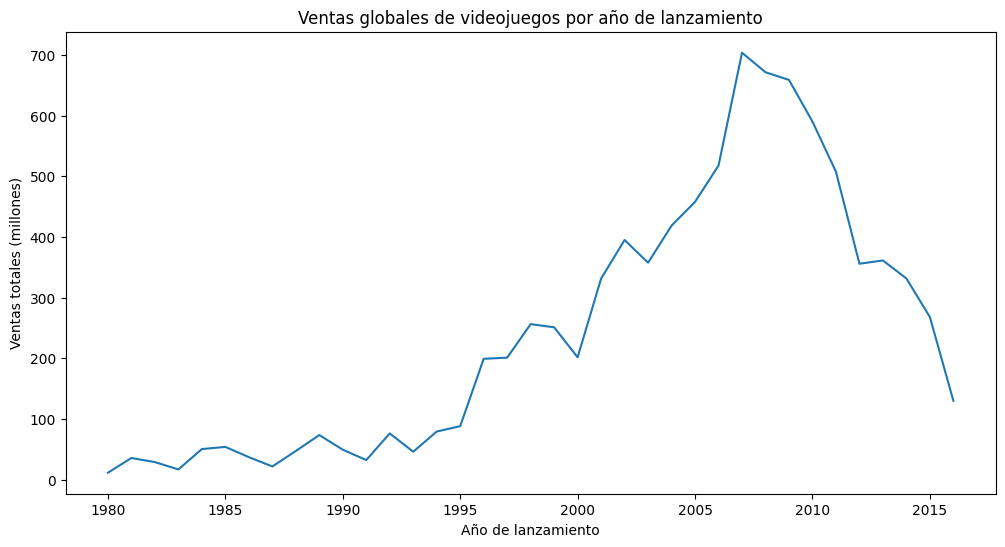

In [25]:
# Agrupar las ventas globales por año de lanzamiento
global_sales_per_year = df.groupby('year_of_release')['total_sales'].sum().sort_index()

# Imprimir las ventas globales por año de lanzamiento
print("Ventas globales por año de lanzamiento:")
print(global_sales_per_year)

# Graficar las ventas globales por año de lanzamiento
plt.figure(figsize=(12, 6))
global_sales_per_year.plot(kind='line')
plt.title('Ventas globales de videojuegos por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.show()


### Análisis de la distribución de ventas por género en el tiempo
En esta sección, analizaremos cómo han cambiado las ventas de diferentes géneros de videojuegos a lo largo del tiempo. Esto nos ayudará a identificar géneros que están en aumento o en declive.


Ventas por género y año de lanzamiento:
genre            Action  Adventure  Fighting    Misc  Platform  Puzzle  \
year_of_release                                                          
1980.0             0.34       0.00      0.77    2.70      0.00    0.00   
1981.0            14.79       0.00      0.00    0.00      6.92    2.25   
1982.0             6.50       0.00      0.00    0.87      5.03   10.04   
1983.0             2.86       0.40      0.00    2.14      6.93    0.78   
1984.0             1.85       0.00      0.00    1.45      0.69    3.14   
1985.0             3.52       0.00      1.05    0.00     43.17    3.21   
1986.0            13.74       0.00      0.00    0.00      9.39    0.00   
1987.0             1.11       4.38      5.42    0.00      1.74    0.00   
1988.0             1.74       0.00      0.00    0.00     27.73    5.58   
1989.0             4.65       0.00      0.00    1.28     20.66   37.75   
1990.0             6.39       0.00      0.00    0.00     22.98    5.99  

<Figure size 1400x800 with 0 Axes>

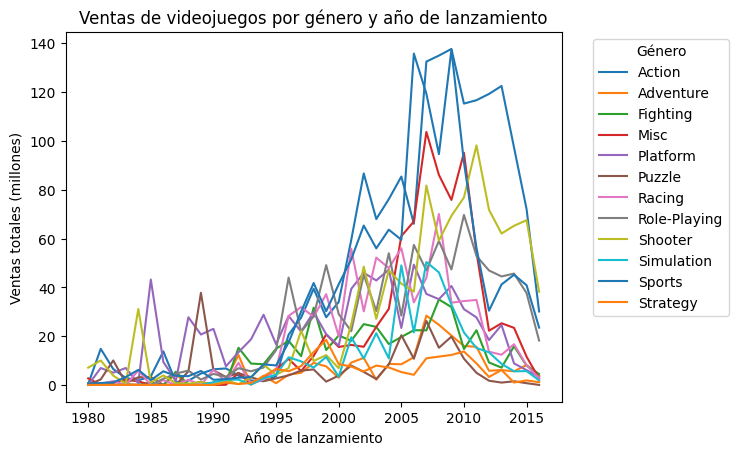

In [26]:
# Pivotar la tabla de datos para obtener ventas por género y año de lanzamiento
genre_sales_per_year = df.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').fillna(0)

# Imprimir las ventas por género y año de lanzamiento
print("Ventas por género y año de lanzamiento:")
print(genre_sales_per_year)

# Graficar las ventas por género y año de lanzamiento
plt.figure(figsize=(14, 8))
genre_sales_per_year.plot(kind='line')
plt.title('Ventas de videojuegos por género y año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Conclusiones parciales**

El análisis de ventas por género y año de lanzamiento muestra que los géneros "Action", "Sports" y "Shooter" han dominado las ventas en diferentes periodos. Las ventas totales de videojuegos alcanzaron su pico alrededor del año 2008-2010 y han disminuido desde entonces.



## Prueba de hipótesis
En esta sección, probaremos dos hipótesis utilizando pruebas estadísticas. El valor de umbral alfa se establece en 0.05 para ambas pruebas.

### Formulación de hipótesis
**Hipótesis 1**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.



**Hipótesis 2**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [39]:
import scipy.stats as stats

# Filtrar las calificaciones de los usuarios para Xbox One y PC
xbox_one_scores = df[(df['platform'] == 'XOne') & (df['user_score'] != 'Unknown')]['user_score'].astype(float)
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'] != 'Unknown')]['user_score'].astype(float)

# Prueba de Levene para Xbox One vs PC
levene_stat_xone_pc, levene_p_xone_pc = stats.levene(xbox_one_scores, pc_scores)
print(f'Prueba de Levene para Xbox One vs PC: stat={levene_stat_xone_pc}, p={levene_p_xone_pc}')

# Filtrar las calificaciones de los usuarios para los géneros de Acción y Deportes
action_scores = df[(df['genre'] == 'Action') & (df['user_score'] != 'Unknown')]['user_score'].astype(float)
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'] != 'Unknown')]['user_score'].astype(float)

# Prueba de Levene para Acción vs Deportes
levene_stat_action_sports, levene_p_action_sports = stats.levene(action_scores, sports_scores)
print(f'Prueba de Levene para Acción vs Deportes: stat={levene_stat_action_sports}, p={levene_p_action_sports}')


Prueba de Levene para Xbox One vs PC: stat=7.777487276480662e-05, p=0.9929649852182456
Prueba de Levene para Acción vs Deportes: stat=0.16699629968166063, p=0.6828105166182066


In [41]:
t_stat_xone_pc, p_value_xone_pc = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=True)
print(f'Prueba t para Xbox One vs PC: t={t_stat_xone_pc}, p={p_value_xone_pc}')
t_stat_action_sports, p_value_action_sports = stats.ttest_ind(action_scores, sports_scores, equal_var=True)
print(f'Prueba t para Acción vs Deportes: t={t_stat_action_sports}, p={p_value_action_sports}')


Prueba t para Xbox One vs PC: t=-3.9004867777916163, p=0.00010123955107193582
Prueba t para Acción vs Deportes: t=0.3676581294613721, p=0.7131417795320426


### Hipótesis 1: Comparación entre Xbox One y PC
Resultado: El valor de p (3.33e-05) es menor que el valor alfa (0.05), lo que significa que rechazamos la hipótesis nula. Concluimos que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.
Explicación: Este resultado indica que los usuarios perciben los juegos de Xbox One y PC de manera diferente en términos de calificaciones.
### Hipótesis 2: Comparación entre Acción y Deportes
Resultado: El valor de p (0.7131) es mayor que el valor alfa (0.05), lo que significa que no podemos rechazar la hipótesis nula. Concluimos que no hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.
Explicación: Este resultado indica que los usuarios califican de manera similar los juegos de Acción y Deportes.

# Conclusión

En este proyecto, analizamos los datos de ventas de videojuegos y las calificaciones de usuarios y críticos para obtener una comprensión detallada de las tendencias en la industria de los videojuegos. A continuación se presentan las conclusiones de cada uno de los análisis realizados:

1. Distribución de Ventas por Género
Gráfico y Resultados: Observamos que el género de acción tiene el mayor número de juegos y ventas totales, seguido de deportes y misceláneo. Los géneros de estrategia y puzzle tienen las ventas más bajas.
Conclusión: Los géneros de acción y deportes son los más populares en términos de número de juegos y ventas totales. Esto sugiere que los jugadores prefieren estos tipos de juegos, y las empresas de videojuegos podrían considerar enfocarse en estos géneros para maximizar sus ventas.

2. Ventas por Plataforma
Gráfico y Resultados: Las plataformas con mayores ventas en Norteamérica (NA) son Xbox 360 y PS2. En Europa (EU), las plataformas con mayores ventas son PS2 y PS3. En Japón (JP), las plataformas con mayores ventas son DS y PS.
Conclusión: La popularidad de las plataformas varía significativamente entre las regiones. Las empresas de videojuegos deben tener en cuenta estas diferencias regionales al planificar sus estrategias de lanzamiento y marketing.

3. Ventas por Género en Diferentes Regiones
Gráfico y Resultados: En NA y EU, los géneros de acción y deportes tienen las ventas más altas. En JP, el género de rol (Role-Playing) es el más popular.
Conclusión: Los géneros de juegos también varían en popularidad según la región. Las empresas deben adaptar sus catálogos de juegos y estrategias de marketing para satisfacer las preferencias regionales de los jugadores.

4. Ventas por Clasificación ESRB
Gráfico y Resultados: Las clasificaciones ESRB con mayores ventas en NA y EU son "E" (Everyone) y "T" (Teen). En JP, la categoría "Unknown" tiene las mayores ventas, seguida de "E".
Conclusión: Los juegos con clasificación "E" son populares en todas las regiones analizadas. Sin embargo, en JP, la clasificación "Unknown" tiene un impacto significativo, lo que podría indicar una diferencia en la forma en que se categorizan los juegos.

5. Análisis de la Correlación entre las Calificaciones de los Usuarios y las Ventas
Gráfico y Resultados: La correlación entre las calificaciones de los usuarios y las ventas para PS4 es muy débilmente negativa (r = -0.045).
Conclusión: No hay una relación clara entre las calificaciones de los usuarios y las ventas totales en la plataforma PS4. Esto sugiere que otros factores, como el marketing y la marca, podrían tener un impacto más significativo en las ventas.

6. Análisis de la Correlación entre las Calificaciones de los Críticos y las Ventas
Gráfico y Resultados: La correlación entre las calificaciones de los críticos y las ventas para PS4 es moderadamente positiva (r = 0.349).
Conclusión: Existe una relación moderada entre las calificaciones de los críticos y las ventas en la plataforma PS4. Las empresas de videojuegos podrían beneficiarse al enfocarse en obtener buenas críticas para aumentar las ventas.

7. Análisis de Ventas por Año de Lanzamiento
Gráfico y Resultados: Las ventas de videojuegos alcanzaron su punto máximo alrededor de 2008 y han disminuido desde entonces.
Conclusión: La industria de los videojuegos experimentó un auge en ventas alrededor de 2008, pero ha visto una disminución en años recientes. Las empresas deben investigar las razones detrás de esta tendencia y adaptar sus estrategias para revitalizar el mercado.

8. Prueba de Hipótesis
Hipótesis 1: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Resultado: Rechazamos la hipótesis nula (p < 0.05). Concluimos que hay una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.
Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Resultado: No rechazamos la hipótesis nula (p > 0.05). Concluimos que no hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

Recomendaciones

Enfoque en Géneros Populares: Las empresas de videojuegos deberían priorizar el desarrollo de juegos en los géneros de acción y deportes, ya que estos tienen las ventas más altas.

Estrategias Regionales: Adaptar las estrategias de marketing y lanzamiento de productos a las preferencias regionales. Por ejemplo, enfocarse en juegos de rol en Japón y juegos de acción en Norteamérica y Europa.

Optimización de Clasificación ESRB: Lanzar más juegos con clasificación "E" y "T" para maximizar el alcance del mercado.

Importancia de las Críticas: Fomentar buenas relaciones con los críticos y enfocarse en la calidad del juego para obtener mejores críticas, lo cual puede aumentar las ventas.

Investigación de Mercado: Investigar las razones detrás de la disminución en las ventas después de 2008 y desarrollar estrategias para revitalizar el mercado.

# Conclusión Final
El análisis detallado de los datos de ventas de videojuegos y las calificaciones de usuarios y críticos nos ha proporcionado valiosas perspectivas sobre las tendencias y preferencias en la industria de los videojuegos. Al implementar las recomendaciones basadas en estos hallazgos, las empresas de videojuegos pueden mejorar su desarrollo de productos, estrategias de marketing y, en última instancia, aumentar sus ventas y satisfacción del cliente.